# Getting Started with GeoPandas

## Load Dataset
To load a geographical dataset, I can exploit the `read_file()` function, which automatically detects the format of the dataset. If the file is a shapefile, I should make sure that the folder containing the shapefile also includes the .prj, .dbf and .shx files.

In this tutorial, I exploit a dataset containing Italian points of interest, provided by [Map Cruzin](https://mapcruzin.com/free-italy-arcgis-maps-shapefiles.htm).

Firstly, I download the file and I put it in the Datasets directory.

In [58]:
import geopandas as gpd

df = gpd.read_file('../../Datasets/italy-points-shape/points.shp')
df.head()

,osm_id,name,type,geometry
0,172072,Novara,motorway_junctio,POINT (8.67394 45.46838)
1,879368,None,traffic_signals,POINT (11.09848 43.89276)
2,918437,None,traffic_signals,POINT (11.28191 43.76584)
3,1313296,None,level_crossing,POINT (10.49418 43.40038)
4,1433338,None,traffic_signals,POINT (11.11487 43.87601)


The Geometry field may contain POINTS, MULTILINES, POLYGONS and so on. The dataset may contain more than one geometry field, but only a geometry field can be set as active. This can be done through the `set_geometry()` function.

In [59]:
df = df.set_geometry('geometry')

The file is loaded as a GeoPandas dataframe. Since the GeoPandas Dataframe is a subclass of the Pandas Dataframe, I can use all the Pandas Dataframe methods with my GeoPandas Dataframe. For example, I can show the number of records through the `shape` attribute:

In [60]:
df.shape

(47427, 4)

## Plot Data
I can plot a first map, through the `plot()` function provided by GeoPandas. If a file contains more than one geometry

<AxesSubplot:>

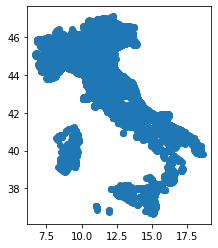

In [61]:
df.plot()

The previous map is too small, thus it can be improved by using `matplotlib`. Firstly, I can increase the figure size. I define a `subplot()` with the desired size and then I pass the `ax` variable to the GeoDataFrame plot:

<AxesSubplot:>

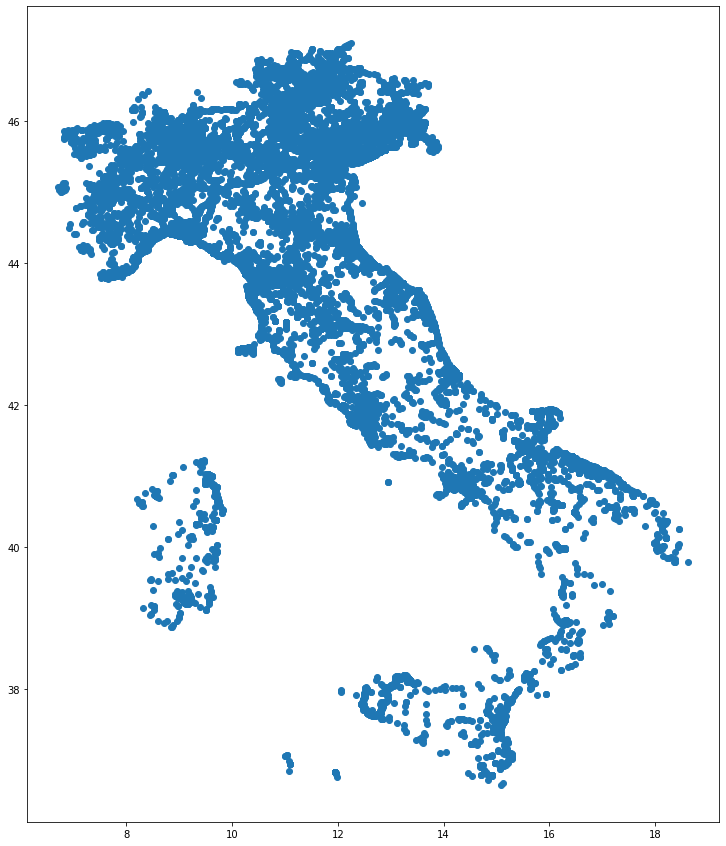

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
df.plot(ax=ax)

I can also change the color of the dots according to the type column. This type of plot is called Chorophlet map. I calculate the number of different types:

In [63]:
len(df['type'].value_counts())

301

To make the map more readable, I drop the types with less than 300 points

target_types = df['type'].value_counts() > 300
tc = target_types[target_types == True].index

In [64]:
def myfilter(x):
    return x in tc

In [65]:
df['delete'] = df['type'].apply(lambda x: myfilter(x))

In [66]:
df = df[df['delete']]

Now I check the number of remaining types

In [67]:
len(df['type'].value_counts())

26

Now I plot the Chorophlet map, simply by passing the `column` attribute to the `plot()` function. I can show the legend by setting `legend=True`.

<AxesSubplot:>

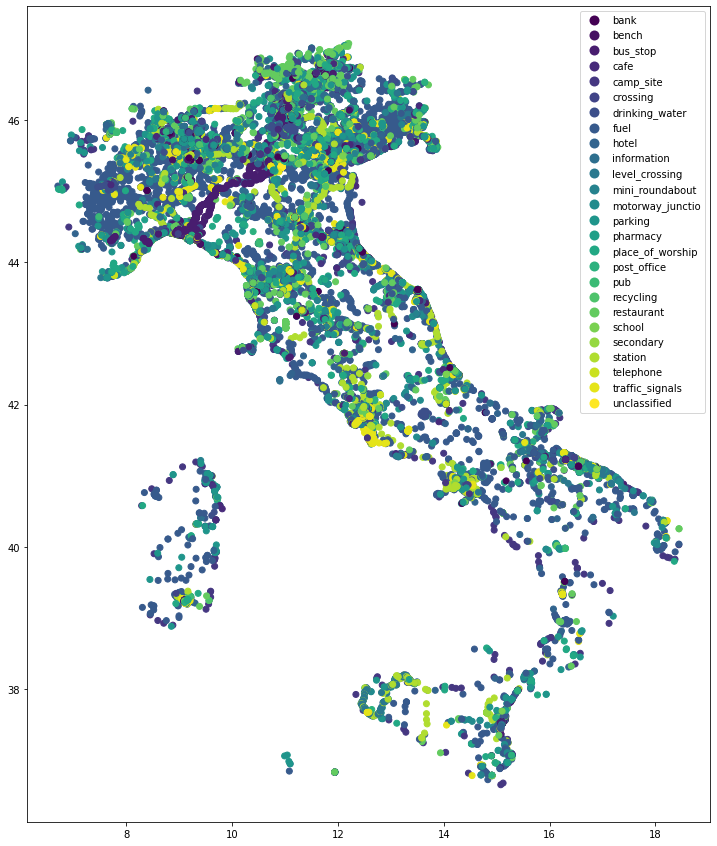

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
df.plot(ax=ax, column='type', legend=True, cmap='viridis')

It is interesting to note that the majority of points of interest are located in North Italy.

## Operations on the Geometry
GeoPandas permits to do many operations directly on the geometry field. For example, I can calculate the distance of each point from a given point, i.e. Rome, which is the Italian capital.
I convert the coordinates to geometry through the `points_from_xy()` function:

In [70]:
rome_longitude = [12.496365]
rome_latitude = [41.902782]
rome_point = gpd.points_from_xy(rome_longitude,rome_latitude)

Then, I calculate the distance of each point in `df` from the `rome_point`. I use the `distance()` function, which is applied to the active geometry:

In [77]:
df['distance'] = df['geometry'].distance(rome_point[0])

/var/folders/vc/8c80t7jd1dq_mmp6cwgwxt640000gn/T/ipykernel_450/3057150632.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['distance'] = df['geometry'].distance(rome_point[0])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [78]:
df.head()

,osm_id,name,type,geometry,delete,distance
0,172072,Novara,motorway_junctio,POINT (8.67394 45.46838),True,5.227276
1,879368,None,traffic_signals,POINT (11.09848 43.89276),True,2.431895
2,918437,None,traffic_signals,POINT (11.28191 43.76584),True,2.223930
3,1313296,None,level_crossing,POINT (10.49418 43.40038),True,2.500311
4,1433338,None,traffic_signals,POINT (11.11487 43.87601),True,2.408765


I order the dataset by increasing distance

In [82]:
df = df.sort_values(by='distance', ascending=True)

Finally, I plot, only points of interest near to Rome, i.e. distance less than 0.2

In [102]:
df_rome = df[df['distance'] < 0.2]

<AxesSubplot:>

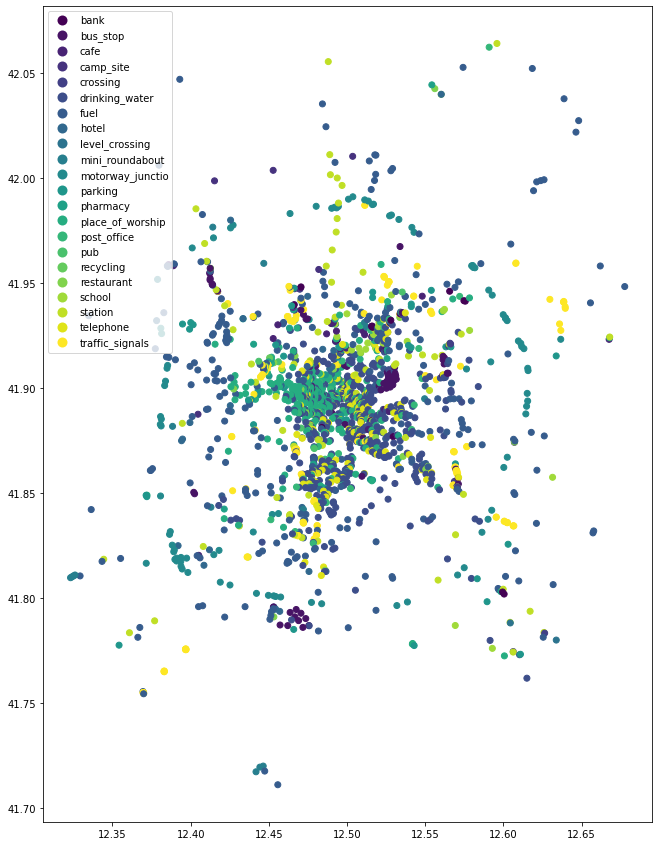

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
df_rome.plot(ax=ax, column='type', legend=True, cmap='viridis')

## References
* https://geopandas.org/en/stable/docs/user_guide/mapping.html